# Income census

Prediction task is to determine the income level for the person represented by the record.  Incomes have been binned at the $50K  level to present a binary classification problem, much like the original UCI/ADULT database.  

## Dataset description

AAGE     — age						
ACLSWKR  — class of worker    
ADTIND   — industry code					
ADTOCC   — occupation code           
AHGA     — education				
AHRSPAY  — wage per hour				
AHSCOL   — enrolled in edu inst last wk                   
AMARITL	 — marital status			
AMJIND   — major industry code		
AMJOCC   — major occupation code		
ARACE    — mace						
AREORGN  — hispanic Origin		
ASEX     — sex					
AUNMEM   — member of a labor union     
AUNTYPE  — reason for unemployment    
AWKSTAT  — full or part time employment stat		 
CAPGAIN  — capital gains					 
CAPLOSS  — capital losses				
DIVVAL   — divdends from stocks					
FILESTAT — tax filer status				
GRINREG  — region of previous residence			
GRINST   — state of previous residence			
HHDFMX   — detailed household and family stat		
HHDREL   — detailed household summary in household     
MARSUPWT — instance weight     
MIGMTR1  — migration code-change in msa     
MIGMTR3  — migration code-change in reg			 
MIGMTR4  — migration code-move within reg     
MIGSAME  — live in this house 1 year ago			
MIGSUN   — migration prev res in sunbelt			
NOEMP    — num persons worked for employer		
PARENT   — family members under 18					
PEFNTVTY — country of birth father			
PEMNTVTY — country of birth mother			
PENATVTY — country of birth self				
PRCITSHP — citizenship						
SEOTR    — own business or self employed			
VETQVA   — fill inc questionnaire for veteran's admin	
VETYN    — veterans benefits				
WKSWORK  — weeks worked in year			
PTOTVAL  — total person income				

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as pl 

%matplotlib inline
pd.options.display.max_columns = 100

In [2]:
data_train = pd.read_csv('census-income_train.csv.data', header=None)
data_test = pd.read_csv('census-income_test.csv.test', header=None)

In [3]:
columns_names = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'PTOTVAL']
dict_names = dict(zip(data_train.columns[::], [columns_name for columns_name in columns_names]))

data_train = data_train.rename(columns=dict_names)
data_test = data_test.rename(columns=dict_names)

In [6]:
data_test.head(5)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVAL
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [7]:
data_train.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,MARSUPWT,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [63]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 43 columns):
AAGE                    199523 non-null int64
ACLSWKR                 199523 non-null object
ADTIND                  199523 non-null int64
ADTOCC                  199523 non-null int64
AHGA                    199523 non-null int64
AHRSPAY                 199523 non-null int64
AHSCOL                  199523 non-null object
AMARITL                 199523 non-null object
AMJIND                  199523 non-null object
AMJOCC                  199523 non-null object
ARACE                   199523 non-null object
AREORGN                 199523 non-null object
ASEX                    199523 non-null int64
AUNMEM                  199523 non-null object
AUNTYPE                 199523 non-null object
AWKSTAT                 199523 non-null object
CAPGAIN                 199523 non-null int64
CAPLOSS                 199523 non-null int64
DIVVAL                  199523 non-null int64
FILES

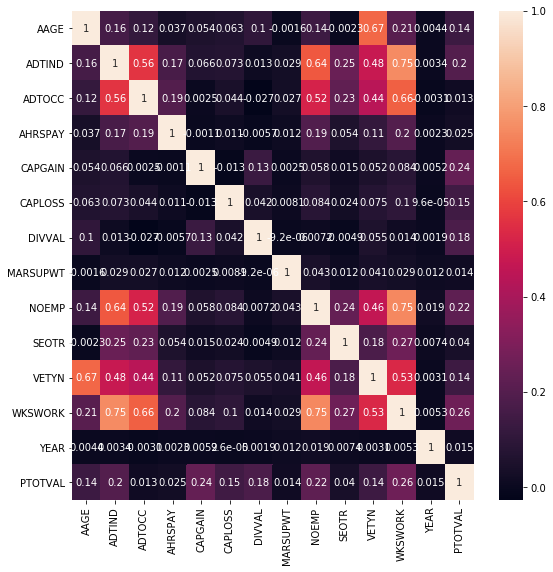

In [34]:
pl.figure(figsize=(9, 9,));
sns.heatmap(data_train.corr(), annot=True);

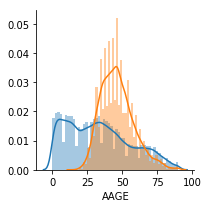

In [32]:
g = sns.FacetGrid(data_train, hue='PTOTVAL');
g = g.map(sns.distplot, 'AAGE');

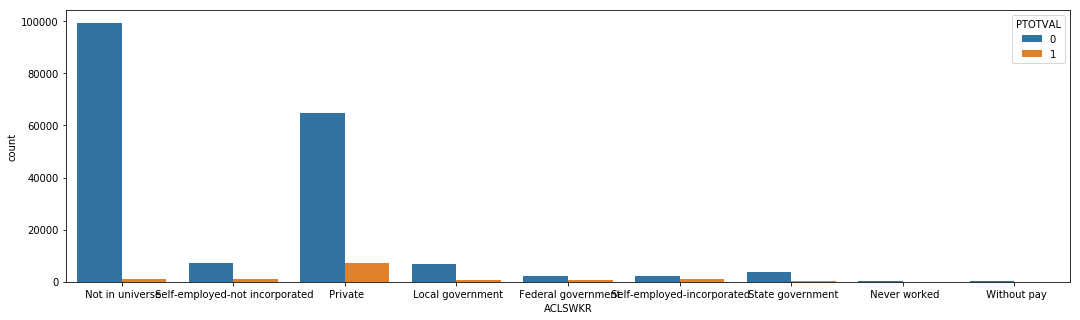

In [44]:
pl.figure(figsize=(18,5,));
sns.countplot(x='ACLSWKR', hue='PTOTVAL', data=data_train, );

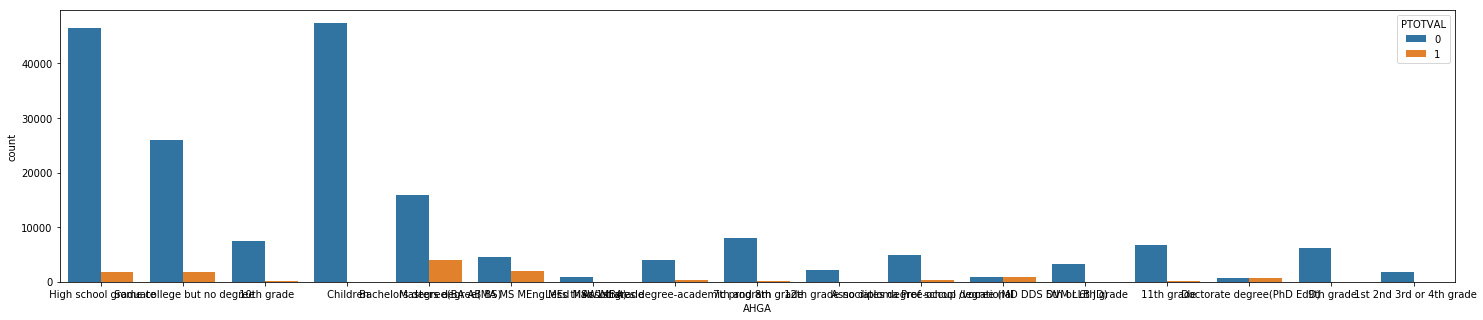

In [47]:
pl.figure(figsize=(25,5,));
sns.countplot(x='AHGA', hue='PTOTVAL', data=data_train);

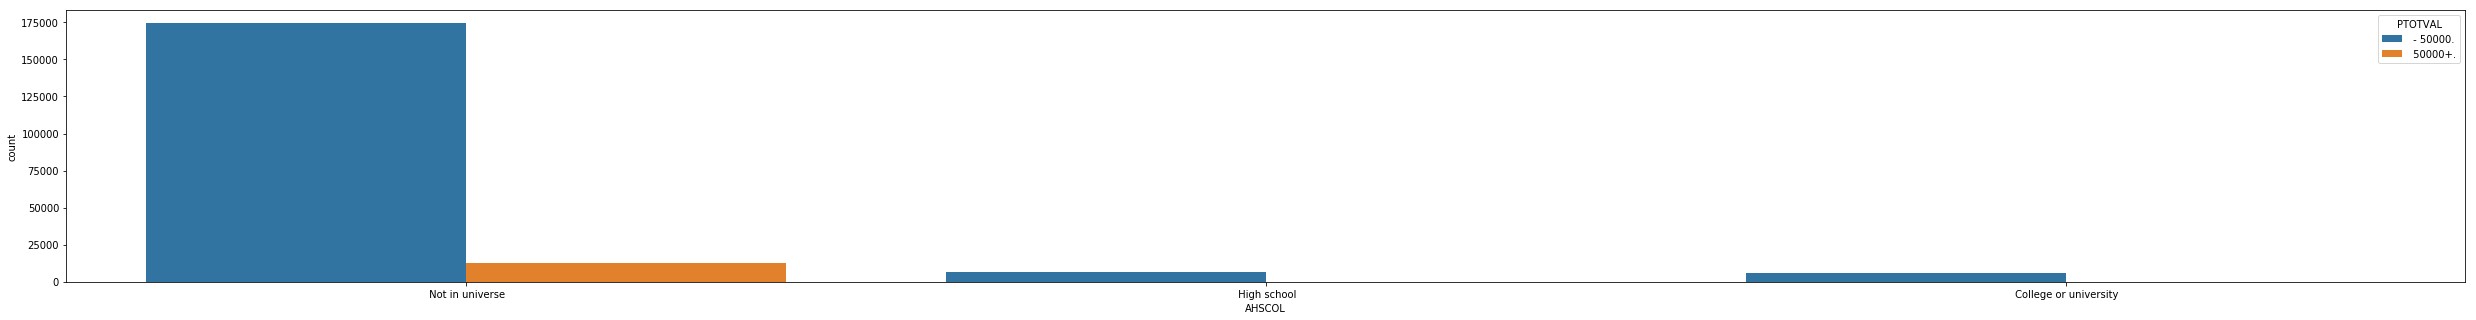

In [8]:
sns.countplot(x='AHSCOL', hue='PTOTVAL', data=data_train);

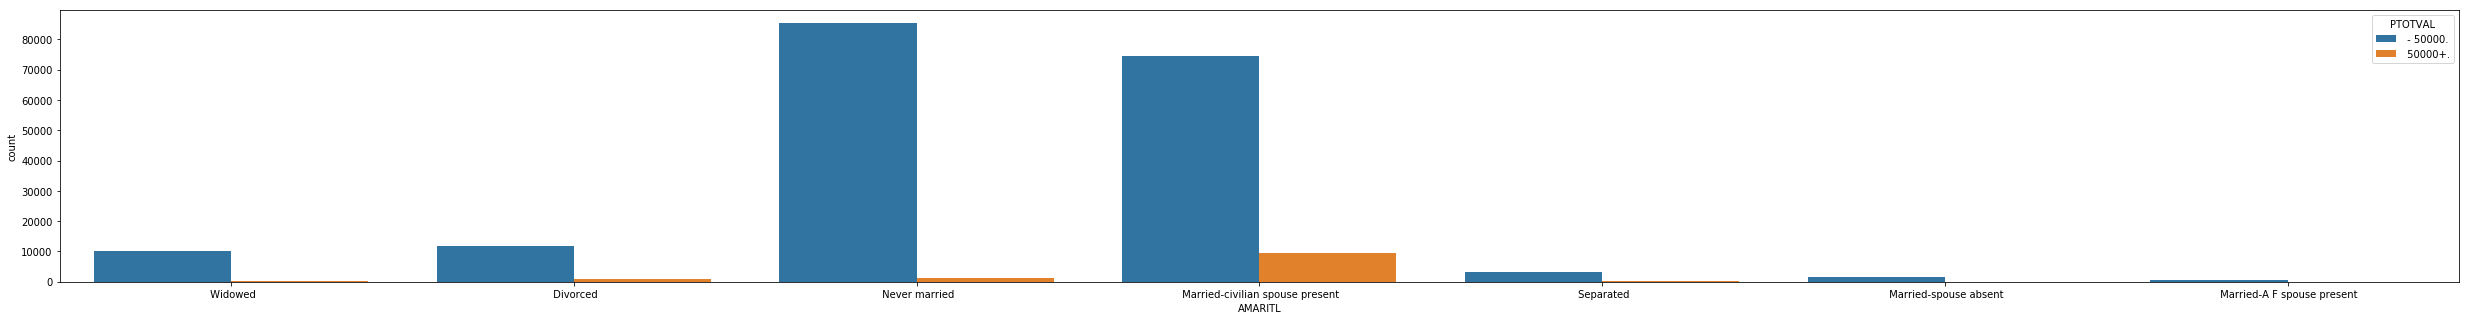

In [10]:
sns.countplot(x='AMARITL', hue='PTOTVAL', data=data_train);

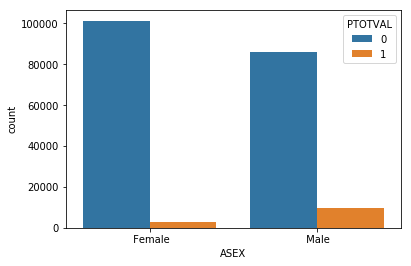

In [48]:
sns.countplot(x='ASEX', hue='PTOTVAL', data=data_train);

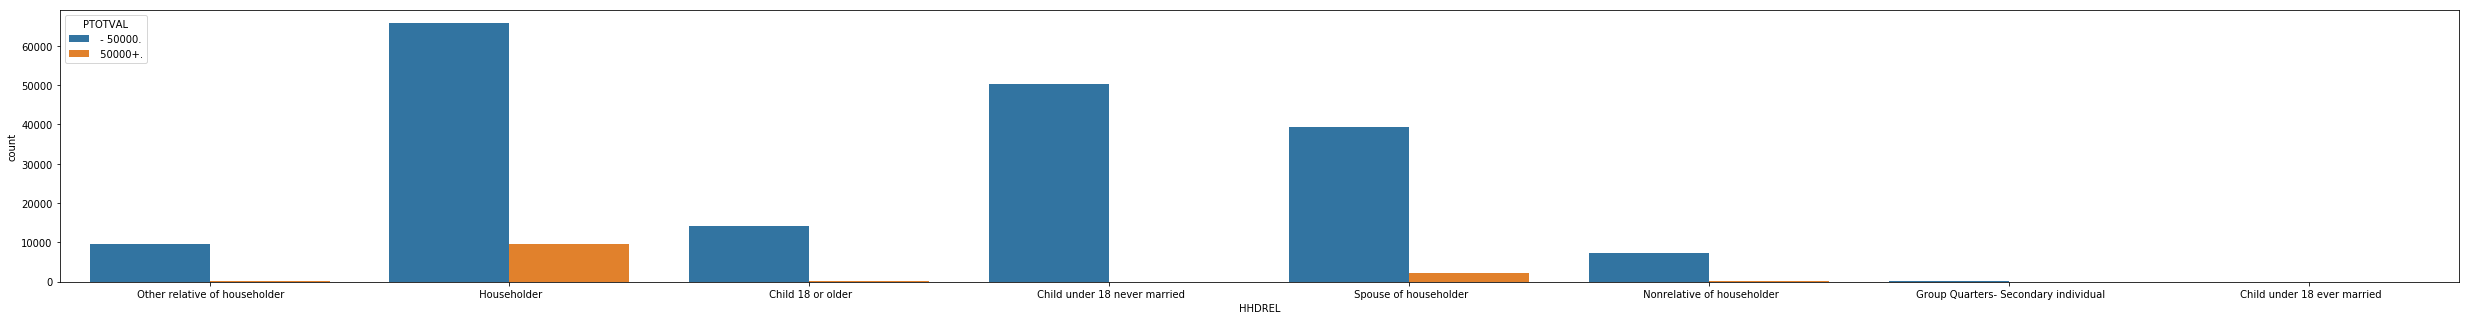

In [25]:
sns.countplot(x='HHDREL', hue='PTOTVAL', data=data_train);

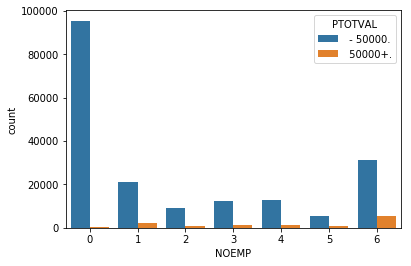

In [6]:
sns.countplot(x='NOEMP', hue='PTOTVAL', data=data_train);

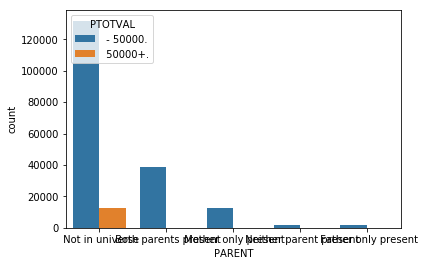

In [7]:
sns.countplot(x='PARENT', hue='PTOTVAL', data=data_train);

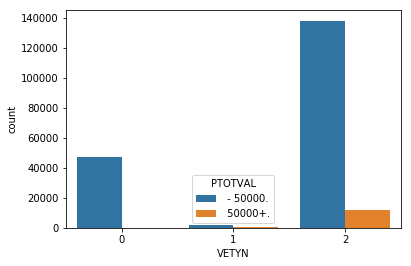

In [13]:
sns.countplot(x='VETYN', hue='PTOTVAL', data=data_train);

In [4]:
def label_encode(le, data, feature, feature_dict):
    try:
        feature_dict[feature]
        data[feature + '_le'] = data[feature].map(feature_dict[feature]).fillna(-1)
        data = data.drop([feature], axis=1)
    except KeyError:
        le.fit(data[feature].astype(str))
        data[feature + '_le'] = le.transform((data[feature].values))
        feature_dict = dict(zip(le.classes_, le.transform(le.classes_)))
        data = data.drop([feature], axis=1)
        return feature_dict

    
def binary_encode(data, feature, value):
    data[feature + '_is_' + str(value)] = pd.DataFrame([1 if i == value else 0 for i in data[feature]])

    
def preprocessing_data(data, feature_dict={}):
    
    with_null_features = ['GRINST', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN', 'PENATVTY', 
                          'PEFNTVTY', 'PEMNTVTY']
    for feature in with_null_features:
        data[feature].fillna('0', inplace=True)

    data['AHGA'] = data['AHGA'].map({' Children': 0, ' Less than 1st grade': 1, ' 1st 2nd 3rd or 4th grade':2, 
                                                 ' 5th or 6th grade': 3, ' 7th and 8th grade': 4, ' 9th grade': 5, 
                                                 ' 10th grade': 6, ' 11th grade': 7, ' 12th grade no diploma':8,
                                                 ' High school graduate': 9, ' Some college but no degree':10, 
                                                 ' Prof school degree (MD DDS DVM LLB JD)': 11, ' Associates degree-occup /vocational': 12,
                                                 ' Associates degree-academic program': 13, ' Bachelors degree(BA AB BS)': 14,
                                                 ' Masters degree(MA MS MEng MEd MSW MBA)': 15, ' Doctorate degree(PhD EdD)': 16})

    data['PTOTVAL'] = data['PTOTVAL'].map({' - 50000.': 0, ' 50000+.': 1})
    data['ASEX'] = data['ASEX'].map({' Female': 0, ' Male': 1})
    
    binary_dict = {'MIGMTR1': ' Nonmover', 'MIGMTR3': ' Nonmover', 'HHDREL': ' Householder', 'MIGMTR4': ' Nonmover',
                   'ACLSWKR': ' Private', 'ADTIND': 0, 'AMARITL': ' Married-civilian spouse present'
#                    'ADTOCC': 0, 'VETYN': 2, 'DIVVAL': 0,'GRINST': ' Not in universe', 'CAPLOSS': 0
                  }

    for item in binary_dict:
        binary_encode(data, item, binary_dict[item])
        data = data.drop([item], axis=1)
    
    le = LabelEncoder()
    le_features = ['AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'AWKSTAT', 
                'FILESTAT', 'GRINREG', 'HHDFMX', 
                'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP']

    for feature in le_features:
        temp_dict = label_encode(le, data, feature, feature_dict)
        feature_dict[feature] = temp_dict
        data = data.drop([feature], axis=1)

    dummies_features = ['AUNMEM', 'MIGSAME', 'MIGSUN', 'SEOTR', 'VETQVA', 'VETYN']
    for feature in dummies_features:
        data = pd.concat((data, pd.get_dummies(data[feature], prefix=feature + '_')),1)
        data = data.drop([feature], axis=1)
    data = data.drop(['MARSUPWT', 'AHSCOL', 'GRINST', 'AUNTYPE', 'YEAR'], axis=1)
    return (data, feature_dict)
   


In [5]:
data_train, feature_dict = preprocessing_data(data_train)
data_test = preprocessing_data(data_test, feature_dict)[0]
data_train = data_train[data_test.columns]

In [6]:
from sklearn.preprocessing import StandardScaler
X_train = data_train.drop(['PTOTVAL'], axis=1)
y_train = data_train['PTOTVAL']

X_test = data_test.drop(['PTOTVAL'], axis=1)
y_test = data_test['PTOTVAL']

# X_train = scale(X_train)
# X_test = scale(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

ros = RandomOverSampler(random_state=0, ratio=0.25)
X_train, y_train = ros.fit_resample(X_train, y_train)

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_par

In [10]:
def train_predict_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy score: ' + str(metrics.accuracy_score(y_test, preds)))

    print('Recall score: ' + str(metrics.recall_score(y_test, preds)))

    print('Precision score: ' + str(metrics.precision_score( y_test, preds)))
    print(metrics.confusion_matrix(y_test, preds))

    preds = model.predict_proba(X_test)
    preds = preds[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)
    print('Auc score: ' + str(metrics.auc(fpr, tpr)))
    
    pl.plot(fpr, tpr)
    pl.xlim([-0.1, 1.1])
    pl.ylim([-0.1, 1.1])
    pl.xlabel('FPR')
    pl.ylabel('TPR')
    pl.title('ROC curve (AUC={:.3f})'.format(metrics.auc(fpr, tpr)))
    pl.show()

Accuracy score: 0.9482668751628877
Recall score: 0.6354671839637892
Precision score: 0.5749597776802691
[[90670  2906]
 [ 2255  3931]]
Auc score: 0.9509597522885005


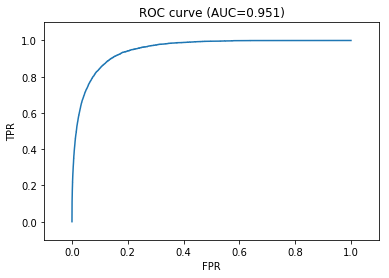

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest_tree = RandomForestClassifier(n_estimators=300, min_samples_leaf=4, max_depth=22, n_jobs=-1, random_state=42)
train_predict_model(forest_tree, X_train, y_train, X_test, y_test)

Learning rate set to 0.329121
0:	learn: 0.3925094	total: 115ms	remaining: 22.9s
1:	learn: 0.3019652	total: 220ms	remaining: 21.8s
2:	learn: 0.2723863	total: 323ms	remaining: 21.2s
3:	learn: 0.2594218	total: 433ms	remaining: 21.2s
4:	learn: 0.2545123	total: 526ms	remaining: 20.5s
5:	learn: 0.2466544	total: 643ms	remaining: 20.8s
6:	learn: 0.2433954	total: 745ms	remaining: 20.5s
7:	learn: 0.2399669	total: 857ms	remaining: 20.6s
8:	learn: 0.2369948	total: 968ms	remaining: 20.5s
9:	learn: 0.2354125	total: 1.07s	remaining: 20.3s
10:	learn: 0.2337356	total: 1.16s	remaining: 20s
11:	learn: 0.2315976	total: 1.27s	remaining: 19.9s
12:	learn: 0.2303003	total: 1.36s	remaining: 19.6s
13:	learn: 0.2288411	total: 1.47s	remaining: 19.5s
14:	learn: 0.2280324	total: 1.57s	remaining: 19.3s
15:	learn: 0.2270207	total: 1.68s	remaining: 19.3s
16:	learn: 0.2259288	total: 1.77s	remaining: 19.1s
17:	learn: 0.2250633	total: 1.88s	remaining: 19s
18:	learn: 0.2245839	total: 1.98s	remaining: 18.8s
19:	learn: 0.22

161:	learn: 0.1858655	total: 17.1s	remaining: 4.02s
162:	learn: 0.1857065	total: 17.3s	remaining: 3.92s
163:	learn: 0.1855337	total: 17.4s	remaining: 3.81s
164:	learn: 0.1853392	total: 17.5s	remaining: 3.71s
165:	learn: 0.1851276	total: 17.6s	remaining: 3.6s
166:	learn: 0.1849970	total: 17.7s	remaining: 3.49s
167:	learn: 0.1847679	total: 17.8s	remaining: 3.38s
168:	learn: 0.1846245	total: 17.9s	remaining: 3.28s
169:	learn: 0.1843355	total: 18s	remaining: 3.17s
170:	learn: 0.1842667	total: 18.1s	remaining: 3.06s
171:	learn: 0.1841408	total: 18.2s	remaining: 2.96s
172:	learn: 0.1840276	total: 18.3s	remaining: 2.85s
173:	learn: 0.1839166	total: 18.4s	remaining: 2.74s
174:	learn: 0.1838407	total: 18.5s	remaining: 2.64s
175:	learn: 0.1837146	total: 18.6s	remaining: 2.53s
176:	learn: 0.1836255	total: 18.7s	remaining: 2.42s
177:	learn: 0.1834602	total: 18.8s	remaining: 2.32s
178:	learn: 0.1833384	total: 18.9s	remaining: 2.21s
179:	learn: 0.1832164	total: 19s	remaining: 2.11s
180:	learn: 0.182

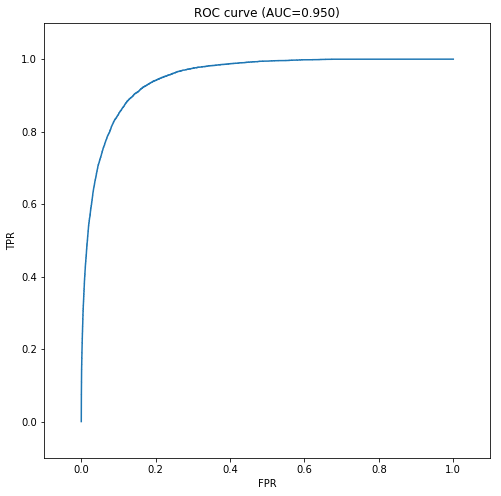

In [66]:
from catboost import CatBoostClassifier 

# categorical_columns = [c for c in X_train.columns if X_train[c].dtype.name == 'object']
# cat_features = list(map(lambda x: list(X_train.columns).index(x), categorical_columns))

cat_model = CatBoostClassifier(iterations = 200)
train_predict_model(cat_model, X_train, y_train, X_test, y_test)

# cat_model.fit(X_train, y_train, cat_features=cat_features)
# preds = cat_model.predict(X_test)

In [36]:
print('CatBoost: ')
print('Accuracy score: ' + str(metrics.accuracy_score(y_test, preds)))

print('Recall score: ' + str(metrics.recall_score(y_test, preds)))

print('Precision score: ' + str(metrics.precision_score(y_test, preds)))

print('Auc score: ' + str(metrics.roc_auc_score(y_test, preds)))

CatBoost: 
Accuracy score: 0.9583809466530342
Recall score: 0.4744584545748464
Precision score: 0.7651199165797706
Auc score: 0.7324149586715388


In [70]:
cat_model.feature_importances_


array([2.42500988e+01, 7.04278579e+00, 1.83705532e+01, 1.02948951e+00,
       4.55829184e+00, 4.93909193e+00, 2.61768498e+00, 4.32886479e+00,
       3.19172198e+00, 1.26331112e+01, 0.00000000e+00, 0.00000000e+00,
       7.41619606e-01, 2.55474265e-02, 7.91779508e-01, 2.29952610e-02,
       4.31331885e-01, 3.20307664e+00, 2.17392425e+00, 4.05921091e-01,
       4.48657919e-01, 1.92174097e-01, 2.18904761e+00, 3.95665263e-01,
       9.31233289e-01, 0.00000000e+00, 6.99904530e-01, 8.75179973e-01,
       2.63471667e-01, 2.56988207e-01, 1.47919112e-01, 4.84881292e-02,
       1.53947896e-01, 3.62499671e-02, 1.29782372e+00, 2.92830448e-01,
       0.00000000e+00, 5.11713538e-02, 1.75839484e-02, 0.00000000e+00,
       1.64634692e-01, 3.01556031e-01, 2.71970551e-01, 9.53564136e-02,
       0.00000000e+00, 4.40526812e-02, 0.00000000e+00, 5.82733552e-02,
       7.92949525e-03])

In [49]:
print(data_train.columns[42])
print(data_train.columns[43])
print(data_train.columns[44])
print(data_train.columns[45])
print(data_train.columns[46])
print(data_train.columns[47])
# print(X_train.columns[38])
# print(X_train.columns[27])
# print(X_train.columns[14])
# print(X_train.columns[40])

VETQVA__ No
VETQVA__ Not in universe
VETQVA__ Yes
VETYN__0
VETYN__1
VETYN__2


In [11]:
forest_tree.feature_importances_

array([6.95619951e-02, 1.18687327e-01, 1.46582419e-01, 9.45679760e-03,
       5.29150331e-02, 7.67423767e-02, 2.09559757e-02, 1.01978321e-01,
       4.96348292e-02, 7.70719780e-02, 2.03735931e-03, 2.06594094e-03,
       3.08543396e-02, 2.07681529e-03, 7.58490771e-03, 2.45185752e-02,
       1.38246603e-02, 3.03843885e-02, 3.83428544e-02, 4.68765581e-03,
       5.02148448e-03, 6.10635973e-03, 2.24378923e-02, 2.41286241e-03,
       2.18236673e-02, 3.06114555e-03, 8.06298504e-03, 7.61023820e-03,
       4.81991028e-03, 3.67922908e-03, 2.94617551e-03, 3.28138584e-03,
       1.56055577e-03, 1.39690494e-03, 2.47389377e-03, 2.05390002e-03,
       9.59273114e-04, 2.03261467e-03, 7.40165654e-04, 2.39182384e-03,
       3.70863336e-03, 3.36328060e-03, 3.24491618e-03, 6.05209950e-04,
       5.45210904e-04, 4.48332050e-05, 1.53546714e-03, 5.52792629e-04,
       1.56263848e-03])

In [9]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()

param_space = {
    'max_depth': hp.choice('max_depth', [20, 22, 24, 26]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [3, 4, 5]),
    'n_estimators': hp.choice('n_estimators', [400, 200, 300]),
#     'criterion': hp.choice('criterion', ["entropy","gini"])
}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
print (best)

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                           
0.9385703209441907                                  
{'max_depth': 26, 'min_samples_leaf': 4, 'n_estimators': 200}
 10%|█         | 1/10 [02:44<24:37, 164.17s/it, best loss: -0.9385703209441907]

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.9407761505558406                                                             
{'max_depth': 22, 'min_samples_leaf': 3, 'n_estimators': 400}                  
 20%|██        | 2/10 [08:09<28:21, 212.66s/it, best loss: -0.9407761505558406]

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.9407761505558406                                                             
{'max_depth': 26, 'min_samples_leaf': 4, 'n_estimators': 200}                  
 30%|███       | 3/10 [10:52<23:03, 197.63s/it, best loss: -0.9407761505558406]

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.9407761505558406                                                             
{'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 300}                  
 40%|████      | 4/10 [14:50<20:58, 209.71s/it, best loss: -0.9407761505558406]

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.9407761505558406                                                             
{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 400}                  
 50%|█████     | 5/10 [20:04<20:05, 241.14s/it, best loss: -0.9407761505558406]

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.9407761505558406                                                             
{'max_depth': 26, 'min_samples_leaf': 4, 'n_estimators': 200}                  
 60%|██████    | 6/10 [22:46<14:29, 217.42s/it, best loss: -0.9407761505558406]

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.9407761505558406                                                             
{'max_depth': 22, 'min_samples_leaf': 4, 'n_estimators': 400}                  
 70%|███████   | 7/10 [28:06<12:24, 248.15s/it, best loss: -0.9407761505558406]

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.9407761505558406                                                             
{'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 200}                  
 80%|████████  | 8/10 [30:46<07:23, 221.65s/it, best loss: -0.9407761505558406]

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.945499867333941                                                              
{'max_depth': 26, 'min_samples_leaf': 3, 'n_estimators': 300}                  
 90%|█████████ | 9/10 [34:52<03:48, 228.79s/it, best loss: -0.945499867333941] 

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                     
0.945499867333941                                                             
{'max_depth': 26, 'min_samples_leaf': 4, 'n_estimators': 400}                 
100%|██████████| 10/10 [40:16<00:00, 257.61s/it, best loss: -0.945499867333941]
best:
{'max_depth': 3, 'min_samples_leaf': 0, 'n_estimators': 2}
